In [1]:
# Подключение необходимых библиотек
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm import tqdm # loop vizualization

In [2]:
# Переключение работы нейросети на GPU, если это возможно
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


In [3]:
# Нормализация изображений и превращение в тензор
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.1307,), (0.3081,))])

In [4]:
# Загрузка обучающей и тестовой выборки
train_ds = datasets.MNIST(
    root="MNIST_data",
    train=True,
    download=True,
    transform=transform,
)
test_ds = datasets.MNIST(
    root="MNIST_data",
    train=False,
    download=True,
    transform=transform,
)

In [5]:
# Создание даталоадеров
train_dataloader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=4)
test_dataloader = DataLoader(test_ds, batch_size=1, shuffle=True, num_workers=4)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


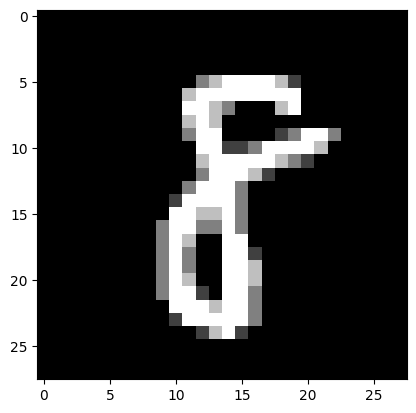

Label: 8


In [6]:
# Визуализация изображений и описаний
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [7]:
# Модель нейросети для распознавания рукописных цифр
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        # Преобразуем входной тензор в одномерный вектор
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x

In [8]:
# Объявление модели и её параметров обучения
model = NN()
model.to(device)
optimizer = Adam(params=model.parameters(), lr=1e-3)
loss_func = nn.CrossEntropyLoss()

In [9]:
# Процесс обучения модели
num_iter = 10
losses = []
for i in tqdm(range(num_iter)):
    for data, label in train_dataloader:
        data = data.to(device)
        label = label.to(device)
        outputs = model(data)
        loss = loss_func(outputs, label)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
        optimizer.zero_grad()

100%|██████████| 10/10 [00:42<00:00,  4.24s/it]


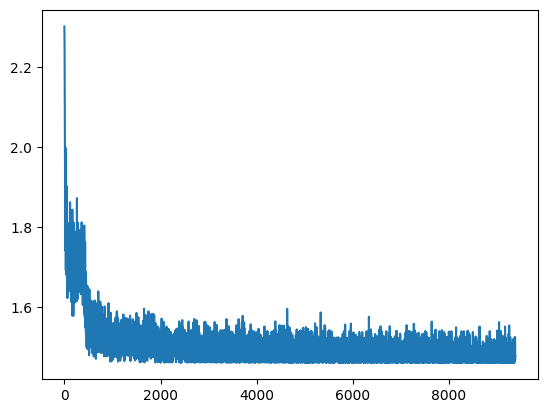

In [10]:
plt.plot(losses)

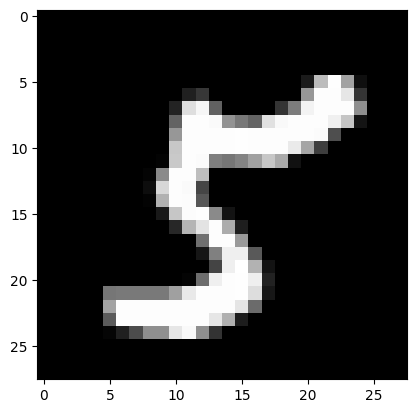

Label: 5
Pred: 5


In [11]:
# Тест модели
test_features, test_labels = next(iter(test_dataloader))
img = test_features[0].squeeze()
label = test_labels[0]
pred = model(test_features[0].to(device)).argmax()
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
print(f"Pred: {pred}")

In [12]:
# Подсчёт точности модели
correct = 0
total = len(test_dataloader)
for data, label in test_dataloader:
    data = data.to(device)
    output = model(data).argmax().cpu()
    if (output == label):
        correct += 1
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 97 %


Predicted value = 4
Your image:


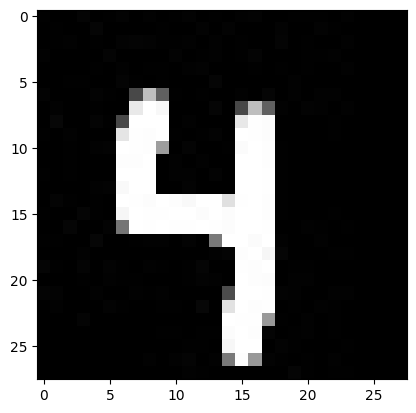

In [13]:
# Проверка работы нейронной сети на собственном изображении
from PIL import Image
path = "MyImg.jpg"
img = Image.open(path)
img_tensor = transforms.ToTensor()(img)
print(f"Predicted value = {model(img_tensor[0].to(device)).argmax()}")
print("Your image:")
plt.imshow(img_tensor[0].detach().numpy(), cmap="gray")

Predicted value = 7
Your image:


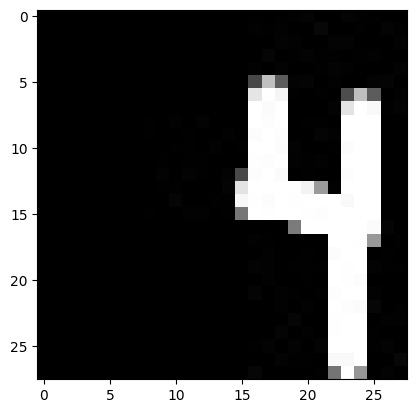

In [14]:
# Проверка работы нейронной сети на сдвинутом изображении
from PIL import Image
path = "MyImg2.jpg"
img = Image.open(path)
img_tensor = transforms.ToTensor()(img)
print(f"Predicted value = {model(img_tensor[0].to(device)).argmax()}")
print("Your image:")
plt.imshow(img_tensor[0].detach().numpy(), cmap="gray")

Predicted value = 6
Your image:


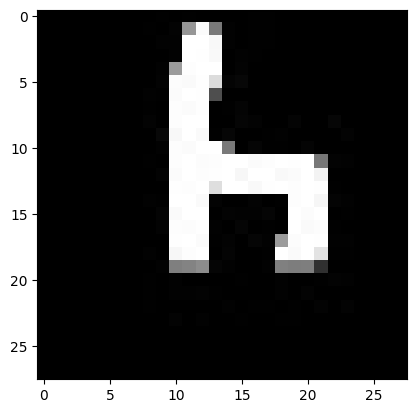

In [23]:
# Проверка работы нейронной сети на перевёрнутом изображении
from PIL import Image
path = "MyImg3.jpg"
img = Image.open(path)
img_tensor = transforms.ToTensor()(img)
print(f"Predicted value = {model(img_tensor[0].to(device)).argmax()}")
print("Your image:")
plt.imshow(img_tensor[0].detach().numpy(), cmap="gray")